In [1]:
!gdown 1B9WJIZNyhrNTmJ2bzBW_jK3RWL2Dk896

Downloading...
From: https://drive.google.com/uc?id=1B9WJIZNyhrNTmJ2bzBW_jK3RWL2Dk896
To: /content/region_roles.csv
100% 431M/431M [00:02<00:00, 147MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
ds = pd.read_csv('region_roles.csv')

<ipython-input-2-f51b0e5aa6d4>:6: DtypeWarning: Columns (11,33) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('region_roles.csv')


# Study the dataset


In [3]:
ds

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,NaN,Младший специалист ручного тестирования,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,NaN,Тестировщик.Net,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,NaN,Пентестер,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,54031261,NaN,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
4,4,55243040,NaN,Специалист по защите информации,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69651,463,66113834,NaN,Программист Java,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<p>В связи с формированием внешнего кадрового ...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN
69652,464,66113885,NaN,Программист 1C,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 130000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<strong>Обязанности:</strong> <p>- Поддержка и...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С: Управление Торговлей'}, {'name'...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN
69653,465,54749225,NaN,Начальник отдела информационных технологий,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<strong>Обязанности</strong> <p>Руководить раб...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Организаторские навыки'}, {'name': ...","[{'id': '9.94', 'name': 'Информационные технол...",Тульская область,NaN
69654,466,55498724,NaN,"Технический директор (DevOps, технолог)",NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 85000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],NaN,<p><strong>Внимание! Мы ищем кандидата в тульс...,"{'id': 'between3And6', '

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   175 non-null    float64
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  1451 non-null   float64
 6   response_letter_required  993 non-null    float64
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

# Selecting columns for analysis

## Salary column

In [5]:
ds['salary'][1]

"{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}"

In [6]:
ds.salary.isna().sum()

32066

In [7]:
print(ds['salary'][1])
print(ds['salary'][1].replace("{", '').replace("}", '').split(','))
print(ds['salary'][1].replace("{", '').replace("}", '').split(',')[0][8:])

{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}
["'from': 25000", " 'to': 50000", " 'currency': 'RUR'", " 'gross': True"]
25000


In [8]:
def salary_from(salary):

  if pd.isna(salary):
    clean_salary = np.nan
  else:
    clean_salary = salary.replace("{", '').replace("}", '').split(',')[0][8:]

  return clean_salary

In [9]:
ds['salary_from'] = ds.salary.apply(salary_from)

In [10]:
ds['salary_from'].describe()

count     37590
unique      898
top        None
freq       3516
Name: salary_from, dtype: object

In [11]:
def salary_from(salary):

  if pd.isna(salary):
    clean_salary = np.nan
  else:
    clean_salary = salary.replace("{", '').replace("}", '').split(',')[0][8:]
    if clean_salary == 'None':
      clean_salary = np.nan

  return clean_salary

In [12]:
ds['salary_from'] = ds.salary.apply(salary_from)

In [13]:
ds.dtypes['salary_from']

dtype('O')

In [14]:
ds['salary_from'] = pd.to_numeric(ds['salary_from'])

In [15]:
ds.dtypes['salary_from']

dtype('float64')

In [16]:
ds['salary_from'] = ds['salary_from'].astype('Int64')

In [17]:
ds.dtypes['salary_from']

Int64Dtype()

In [18]:
ds['salary_from']

0          <NA>
1         25000
2          <NA>
3         26000
4         20000
          ...  
69651      <NA>
69652    130000
69653     50000
69654     85000
69655      <NA>
Name: salary_from, Length: 69656, dtype: Int64

In [19]:
print(ds['salary'][1])
print(ds['salary'][1].replace("{", '').replace("}", '').split(','))
print(ds['salary'][1].replace("{", '').replace("}", '').split(',')[2][14:17])

{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}
["'from': 25000", " 'to': 50000", " 'currency': 'RUR'", " 'gross': True"]
RUR


In [20]:
def currency(salary):

  if pd.isna(salary):
    clean_salary = np.nan
  else:
    clean_salary = salary.replace("{", '').replace("}", '').split(',')[2][14:17]

  return clean_salary

In [21]:
ds['currency'] = ds.salary.apply(salary_from)

In [22]:
ds['currency'].describe()

count     34074
unique      897
top       50000
freq       3040
Name: currency, dtype: object

In [23]:
ds['currency'] = ds.salary.apply(currency)

In [24]:
ds['currency']

0        NaN
1        RUR
2        NaN
3        RUR
4        RUR
        ... 
69651    NaN
69652    RUR
69653    RUR
69654    RUR
69655    NaN
Name: currency, Length: 69656, dtype: object

In [25]:
new_df = ds[['name', 'salary_from', 'currency']]
print(new_df)

                                                    name  salary_from currency
0                Младший специалист ручного тестирования         <NA>      NaN
1                                        Тестировщик.Net        25000      RUR
2                                              Пентестер         <NA>      NaN
3       Ведущий Специалист по информационным технологиям        26000      RUR
4                        Специалист по защите информации        20000      RUR
...                                                  ...          ...      ...
69651                                   Программист Java         <NA>      NaN
69652                                     Программист 1C       130000      RUR
69653         Начальник отдела информационных технологий        50000      RUR
69654            Технический директор (DevOps, технолог)        85000      RUR
69655  Начальник отдела по защите информации и информ...         <NA>      NaN

[69656 rows x 3 columns]


In [26]:
ds['currency'].unique()

array([nan, 'RUR', 'USD', 'EUR', 'KZT'], dtype=object)

In [27]:
exchange_rates = {'RUR': 1, 'USD': 61, 'EUR': 61, 'KZT': 0.13}

In [28]:
ds['converted_salary'] = ds['currency'].map(exchange_rates) * ds['salary_from']

In [29]:
ds.dtypes['converted_salary']

Float64Dtype()

In [30]:
ds['converted_salary'] = ds['converted_salary'].astype('Int64')

In [31]:
ds.dtypes['converted_salary']

Int64Dtype()

In [32]:
ds['converted_salary']

0          <NA>
1         25000
2          <NA>
3         26000
4         20000
          ...  
69651      <NA>
69652    130000
69653     50000
69654     85000
69655      <NA>
Name: converted_salary, Length: 69656, dtype: Int64

### Maximum and minimum salary in the IT sector:

In [33]:
converted_salary_value = ds['converted_salary']

In [72]:
max_value = converted_salary_value.max()
min_value = converted_salary_value.min()
print('Maximum salary: ', max_value, 'Minimum salary: ', min_value)

Maximum salary:  1000000 Minimum salary:  25


We will select vacancies only from the IT sector

In [35]:
ds['key_skills']

0                                                       []
1        [{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...
2        [{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...
3        [{'name': 'Пользователь ПК'}, {'name': 'Работа...
4        [{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...
                               ...                        
69651                                                   []
69652    [{'name': '1С: Управление Торговлей'}, {'name'...
69653    [{'name': 'Организаторские навыки'}, {'name': ...
69654                                                   []
69655    [{'name': 'Информационная безопасность'}, {'na...
Name: key_skills, Length: 69656, dtype: object

In [36]:
ds['key_skills'][1]

"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Тестирование'}, {'name': 'C#'}, {'name': 'API'}]"

In [37]:
js.loads(ds['key_skills'][1].replace("'", '"'))

[{'name': 'Git'},
 {'name': 'SQL'},
 {'name': 'Тестирование'},
 {'name': 'C#'},
 {'name': 'API'}]

In [38]:
def text_to_json(text):

  return json.loads(text.replace('"', '').replace("'", '"'))

In [39]:
ds['key_skills'] = ds['key_skills'].fillna('[]')
ds['key_skills']

0                                                       []
1        [{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...
2        [{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...
3        [{'name': 'Пользователь ПК'}, {'name': 'Работа...
4        [{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...
                               ...                        
69651                                                   []
69652    [{'name': '1С: Управление Торговлей'}, {'name'...
69653    [{'name': 'Организаторские навыки'}, {'name': ...
69654                                                   []
69655    [{'name': 'Информационная безопасность'}, {'na...
Name: key_skills, Length: 69656, dtype: object

In [73]:
def text_to_json(text):
  try:
    return json.loads(text.replace("'", '"'))
  except:
    print('Error: ', text)

In [41]:
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
ds['key_skills_json'] = ds['key_skills'].apply(text_to_json)

In [42]:
ds['key_skills_json']

0        []
1        []
2        []
3        []
4        []
         ..
69651    []
69652    []
69653    []
69654    []
69655    []
Name: key_skills_json, Length: 69656, dtype: object

In [43]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
ds['key_skills_list'] = ds['key_skills_json'].apply(get_values)

In [44]:
ds['key_skills_list']

0        []
1        []
2        []
3        []
4        []
         ..
69651    []
69652    []
69653    []
69654    []
69655    []
Name: key_skills_list, Length: 69656, dtype: object

Sort vacancies related to IT

In [45]:
ds['specializations'][1]

"[{'id': '1.221', 'name': 'Программирование, Разработка', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.82', 'name': 'Инженер', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.117', 'name': 'Тестирование', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]"

In [46]:
specialization = 'Интернет'
spec_list = 'Информационные технологии, Интернет'
specialization in spec_list


True

In [47]:
def is_specialization_correct(spec_list):
  return 'Информационные технологии' in spec_list

In [48]:
filter = ds['specializations'].apply(is_specialization_correct)
filter

0        True
1        True
2        True
3        True
4        True
         ... 
69651    True
69652    True
69653    True
69654    True
69655    True
Name: specializations, Length: 69656, dtype: bool

In [49]:
df = ds[filter]
df

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,experience,key_skills,specializations,region,immediate_redirect_url,salary_from,currency,converted_salary,key_skills_json,key_skills_list
0,0,49059633,NaN,Младший специалист ручного тестирования,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN,<NA>,NaN,<NA>,[],[]
1,1,54653519,NaN,Тестировщик.Net,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,25000,RUR,25000,[],[]
2,2,55116066,NaN,Пентестер,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,<NA>,NaN,<NA>,[],[]
3,3,54031261,NaN,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN,26000,RUR,26000,[],[]
4,4,55243040,NaN,Специалист по защите информации,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN,20000,RUR,20000,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69651,463,66113834,NaN,Программист Java,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN,<NA>,NaN,<NA>,[],[]
69652,464,66113885,NaN,Программист 1C,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 130000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С: Управление Торговлей'}, {'name'...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN,130000,RUR,130000,[],[]
69653,465,54749225,NaN,Начальник отдела информационных технологий,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Организаторские навыки'}, {'name': ...","[{'id': '9.94', 'name': 'Информационные технол...",Тульская область,NaN,50000,RUR,50000,[],[]
69654,466,55498724,NaN,"Технический директор (DevOps, технолог)",NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 85000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",[],"[{'id': '9.94', 'name': 'Информационные технол...",Тульская область,NaN,85000,RUR,85000,[],[]


In [50]:
vacancy_count = df['name'].value_counts()
vacancy_count[:50]

Системный администратор                                                   1657
Программист 1С                                                            1122
Специалист технической поддержки                                           480
Системный аналитик                                                         466
Аналитик                                                                   343
Инженер-программист                                                        328
Программист 1C                                                             325
Графический дизайнер                                                       314
Инженер технической поддержки                                              273
Бизнес-аналитик                                                            268
Дизайнер                                                                   252
Технический писатель                                                       214
Руководитель проекта                                

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50397 entries, 0 to 69655
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                50397 non-null  int64  
 1   id                        50397 non-null  int64  
 2   premium                   118 non-null    float64
 3   name                      50397 non-null  object 
 4   department                4488 non-null   object 
 5   has_test                  1124 non-null   float64
 6   response_letter_required  641 non-null    float64
 7   area                      50397 non-null  object 
 8   salary                    22726 non-null  object 
 9   type                      50397 non-null  object 
 10  address                   26915 non-null  object 
 11  response_url              0 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              50397 non-null  object 
 14  create

In [52]:
converted_salary_value = df['converted_salary']

In [74]:
max_value = converted_salary_value.max()
min_value = converted_salary_value.min()
print('Maximum wage: ', max_value, 'Minimum wage: ', min_value)

Maximum wage:  1000000 Minimum wage:  25


Медианная зарплата:

In [54]:
median_value = converted_salary_value.median()
print('Median salary: ', median_value)

Медиана заработной платы:  60000.0


Процентили:

In [75]:
percentile_10_value = converted_salary_value.quantile(0.10)
percentile_25_value = converted_salary_value.quantile(0.25)
percentile_50_value = converted_salary_value.quantile(0.50)
percentile_75_value = converted_salary_value.quantile(0.75)
percentile_90_value = converted_salary_value.quantile(0.90)
print('10th percentile salary: ', percentile_10_value)
print('25th percentile salary: ', percentile_25_value)
print('50th percentile salary: ', percentile_50_value)
print('75th percentile salary: ', percentile_75_value)
print('90th percentile salary: ', percentile_90_value)

10th percentile salary:  26000
25th percentile salary:  40000
50th percentile salary:  60000
75th percentile salary:  100000
90th percentile salary:  160000


Average salary:

In [76]:
mean_value = converted_salary_value.mean()
print('Average salary: ', mean_value)

Average salary:  83194.42143528364


In [57]:
converted_salary_value.describe()

count         20219.0
mean     83194.421435
std      64523.939928
min              25.0
25%           40000.0
50%           60000.0
75%          100000.0
max         1000000.0
Name: converted_salary, dtype: Float64

In [58]:
df.describe()

,Unnamed: 0,id,premium,has_test,response_letter_required,sort_point_distance,archived,accept_temporary,salary_from,converted_salary
count,50397.000000,5.039700e+04,118.0,1124.0,641.0,0.0,2.0,2595.0,20219.0,20219.0
mean,4011.464770,5.469764e+07,1.0,1.0,1.0,NaN,1.0,1.0,79285.622781,83194.421435
std,5298.202176,3.761967e+06,0.0,0.0,0.0,NaN,0.0,0.0,61960.538322,64523.939928
min,0.000000,6.555939e+06,1.0,1.0,1.0,NaN,1.0,1.0,25.0,25.0
25%,388.000000,5.441001e+07,1.0,1.0,1.0,NaN,1.0,1.0,36000.0,40000.0
50%,1396.000000,5.517766e+07,1.0,1.0,1.0,NaN,1.0,1.0,60000.0,60000.0
75%,6362.000000,5.546692e+07,1.0,1.0,1.0,NaN,1.0,1.0,100000.0,100000.0
max,20065.000000,6.611540e+07,1.0,1.0,1.0,NaN,1.0,1.0,1000000.0,1000000.0


In [59]:
df[df['salary_from'] > 50000]

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,experience,key_skills,specializations,region,immediate_redirect_url,salary_from,currency,converted_salary,key_skills_json,key_skills_list
33,33,55137619,NaN,Руководитель проекта,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 57500, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Работа в команде'}, {'name': 'Управ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,57500,RUR,57500,[],[]
94,94,55272632,NaN,Компьютерный Мастер,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 64000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.270', 'name': 'Сетевые технологии',...",Астраханская область,NaN,64000,RUR,64000,[],[]
109,109,55265017,NaN,"PHP-программист Middle, Senior",NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 200000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'PHP'}, {'name': 'MySQL'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,200000,RUR,200000,[],[]
110,110,47328794,NaN,Программист 1С отдела управленческого учета,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Работа с базами данных'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,100000,RUR,100000,[],[]
112,112,49639319,NaN,Программист 1C,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 80000, 'to': 80000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'SQL'}, {'name': 'MS SQL'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,80000,RUR,80000,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69645,457,55903651,NaN,Ведущий Web-разработчик/Team Lead,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'jQuery'}, {'name': 'PHP'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN,100000,RUR,100000,[],[]
69646,458,55904184,NaN,"Веб-программист (PHP, Битрикс)",NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 70000, 'to': 130000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'PHP'}, {'name': 'HTML'}, {'name': '...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN,70000,RUR,70000,[],[]
69647,459,55904191,NaN,"Ведущий веб-программист (PHP, Битрикс)",NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 130000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Веб-программирование'}, {'name': 'У...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN,130000,RUR,130000,[],[]
69652,464,66113885,NaN,Программист 1C,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 130000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С: Управление Торговлей'}, {'name'...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,NaN,130000,RUR,130000,[],[]


In [60]:
df['converted_salary'].describe().astype(int)

count      20219
mean       83194
std        64523
min           25
25%        40000
50%        60000
75%       100000
max      1000000
Name: converted_salary, dtype: int64

In [61]:
salary_value=df['converted_salary']

<function matplotlib.pyplot.show(close=None, block=None)>

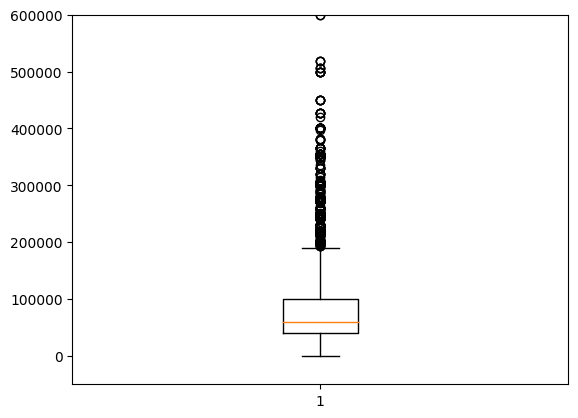

In [62]:
plt.boxplot(df['converted_salary'].dropna())
plt.ylim((None,600000))
plt.show

Experience:

In [77]:
df['experience'].describe()

count                                                 50397
unique                                                    4
top       {'id': 'between1And3', 'name': 'От 1 года до 3...
freq                                                  26163
Name: experience, dtype: object

In [78]:
exp_count = df['experience'].value_counts()
exp_count

{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}    26163
{'id': 'between3And6', 'name': 'От 3 до 6 лет'}         16548
{'id': 'noExperience', 'name': 'Нет опыта'}              6011
{'id': 'moreThan6', 'name': 'Более 6 лет'}               1675
Name: experience, dtype: int64

In [79]:
experience = df['experience'].apply(lambda x: eval(x)['name'])
df['experience_name'] = experience
df['experience_name']

<ipython-input-79-0c4bf9c22cc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience_name'] = experience


0                 Нет опыта
1        От 1 года до 3 лет
2             От 3 до 6 лет
3                 Нет опыта
4                 Нет опыта
                ...        
69651         От 3 до 6 лет
69652    От 1 года до 3 лет
69653    От 1 года до 3 лет
69654         От 3 до 6 лет
69655           Более 6 лет
Name: experience_name, Length: 50397, dtype: object

In [66]:
df['experience_name'].describe()

count                  50397
unique                     4
top       От 1 года до 3 лет
freq                   26163
Name: experience_name, dtype: object

In [67]:
experience_count = df['experience_name'].value_counts()
experience_count

От 1 года до 3 лет    26163
От 3 до 6 лет         16548
Нет опыта              6011
Более 6 лет            1675
Name: experience_name, dtype: int64

<ipython-input-80-5bec81f2346c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


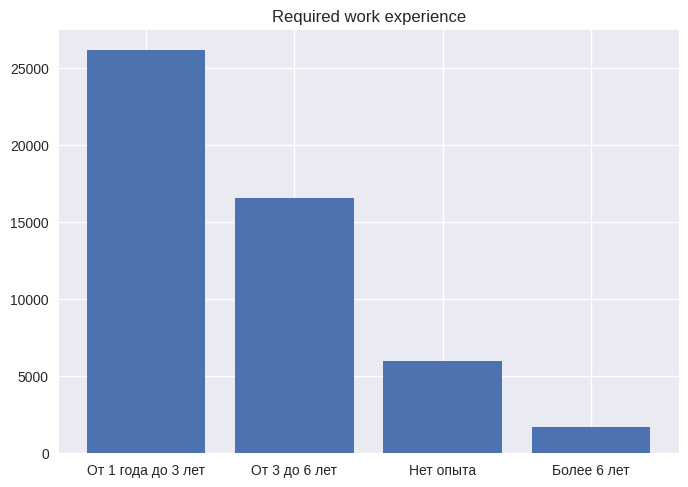

In [80]:
plt.style.use('seaborn')
plt.bar(experience_count.index, experience_count.values)
plt.title('Required work experience')
plt.show()

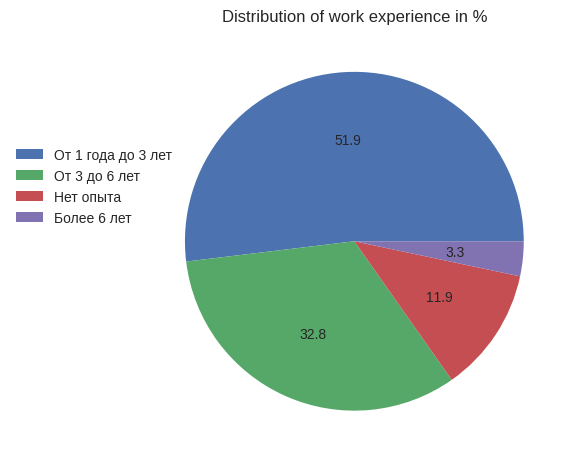

In [81]:
plt.pie(experience_count.values, autopct='%.1f')
plt.legend(bbox_to_anchor = (-0.15, 0.50, 0.25, 0.25), labels = experience_count.index)
plt.title('Distribution of work experience in %')
plt.show()

Top 50 vacancies in the IT sector

In [70]:
ds['name'].describe()

count                       69656
unique                      31756
top       Системный администратор
freq                         1659
Name: name, dtype: object

In [71]:
vacancy_count = ds['name'].value_counts()
vacancy_count[:50]

Системный администратор                                       1659
Программист 1С                                                1123
Менеджер по персоналу                                          680
Менеджер по подбору персонала                                  571
Специалист технической поддержки                               483
Специалист по кадрам                                           469
Системный аналитик                                             466
Агент по недвижимости                                          374
Аналитик                                                       346
SMM-менеджер                                                   342
Инженер-программист                                            330
Программист 1C                                                 325
Графический дизайнер                                           316
Специалист отдела кадров                                       284
Бизнес-аналитик                                               